In [41]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import os
# from io import StringIO
import io
from PIL import Image
import matplotlib.pyplot as plt
import time
import tensorflow as tf
%matplotlib inline

/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [52]:
def load_dataset():
    def load_images(filename):
        if (os.path.exists(filename)):
            # print filename
            np_imgs = []
            zf = ZipFile(filename, 'r')
            # print len(zf.namelist())
            # sizes = []
            # TODO: put len(zf.namelist())
            for i in range(1, 15):
                data = io.BytesIO(zf.read(zf.namelist()[i]))
                img = Image.open(data)
                np_imgs.append(np.array(img))
            return np_imgs

    def load_labels(filename):
        if (os.path.exists(filename)):
            # print filename
            return pd.read_csv(ZipFile(filename, 'r').open('labels.csv'))

    X_train = load_images('data/train.zip')
    Y_train = load_labels('data/labels.csv.zip')
    # X_test = []
    X_test = load_images('data/test.zip')
    return X_train, Y_train, X_test

In [53]:
X_train_orig, Y_train_orig, X_test_orig = load_dataset()
# print X_train
# print Y_train

(500, 375, 3)


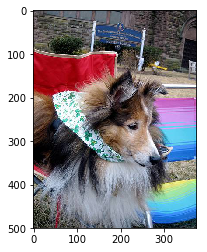

In [15]:
print(X_train_orig[10].shape)
plt.imshow(X_train_orig[10])

(500, 388, 3)


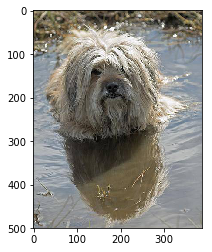

In [16]:
print(X_test_orig[10].shape)
plt.imshow(X_test_orig[10])

In [ ]:
#######################################################################################

In [46]:
Y_sample = pd.read_csv(ZipFile('data/sample_submission.csv.zip', 'r').open('sample_submission.csv'))

In [16]:
Y_sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [17]:
all_breeds = list(Y_sample.columns)
print(all_breeds)

['id', 'affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier',

In [18]:
Y_train_orig.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [19]:
Y_train = pd.DataFrame(columns=all_breeds)

In [20]:
Y_train

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [21]:
Y_train['id'] = Y_train_orig['id']

In [22]:
Y_train

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001513dfcb2ffafc82cccf4d8bbaba97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001cdf01b096e06d78e9e5112d419397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00214f311d5d2247d5dfe4fe24b2303d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0021f9ceb3235effd7fcde7f7538ed62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,002211c81b498ef88e1b40b9abf84e1d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00290d3e1fdd27226ba27a8ce248ce85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,002a283a315af96eaea0e28e7163b21b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,003df8b8a8b05244b1d920bb6cf451f9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0042188c895a2f14ef64a918ed9c7b64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
Y_train_inter = Y_train_orig.copy(deep=True)

Y_train_inter = Y_train_inter.sample(100)

Y_train_inter

,id,breed
5417,88a3cc5a66105089522f6fd894e65a55,basenji
2578,4025c67b4183b9dca4037eaa4531ba1b,bernese_mountain_dog
493,0be845d1fe8a0ad6da6ffa454ab33e8a,newfoundland
5206,836e542611a2ee50d6df3f3a9834132a,malinois
1063,1a62a5420f6cb1e0cae9a8aa7a505d43,irish_wolfhound
8803,dccd2dd384090bfdf9105015167aed23,beagle
2812,4521c10d21dccf32ed1ebc9d1a3d0d5a,tibetan_terrier
3792,5debb657539c327d21ee8696a2d7e07d,redbone
398,09927a82d649607a7704ac6043cdfa9a,west_highland_white_terrier
1192,1db6673169b83ed310c140a7ecea695d,pug


In [61]:
# Manipulating breed text into class number
# TODO: add Y_train_inter['class'] = i
for i, breed in enumerate(all_breeds):
    # print(i, breed)
    print(Y_train_inter[Y_train_inter['breed'] == breed])
    # temp = Y_train_inter[Y_train_inter['breed'] == breed]
    # temp['class'] = i

Empty DataFrame
Columns: [id, breed]
Index: []
                                    id          breed
3656  5b154e409fe61a86f37e842480f44a10  affenpinscher
                                    id         breed
6193  9c0d4cee4acefbd21b643266a22aab7d  afghan_hound
                                    id                breed
6927  adeb01e891e95b347ea3132451fab8ec  african_hunting_dog
Empty DataFrame
Columns: [id, breed]
Index: []
Empty DataFrame
Columns: [id, breed]
Index: []
Empty DataFrame
Columns: [id, breed]
Index: []
                                    id               breed
9580  f0649324ca9ee431d8c37ef361a0d9fd  australian_terrier
                                    id    breed
5417  88a3cc5a66105089522f6fd894e65a55  basenji
7578  bdf2a1c73fa4fe7fd2a26356a30cb25c  basenji
                                    id   breed
3054  4b659b822211c1d18baf2a3be382db0d  basset
                                    id   breed
8803  dccd2dd384090bfdf9105015167aed23  beagle
Empty DataFrame
Columns: [id

In [51]:
Y_train_inter

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [29]:
# for i, row in Y_train_orig.iterrows():
#     print(i)
#     print(row['id'])
#     print(row['breed'])
#     # print(Y_train[Y_train['id'] = row['id']])
#     print('***')

0
000bec180eb18c7604dcecc8fe0dba07
boston_bull
***
1
001513dfcb2ffafc82cccf4d8bbaba97
dingo
***
2
001cdf01b096e06d78e9e5112d419397
pekinese
***
3
00214f311d5d2247d5dfe4fe24b2303d
bluetick
***
4
0021f9ceb3235effd7fcde7f7538ed62
golden_retriever
***
5
002211c81b498ef88e1b40b9abf84e1d
bedlington_terrier
***
6
00290d3e1fdd27226ba27a8ce248ce85
bedlington_terrier
***
7
002a283a315af96eaea0e28e7163b21b
borzoi
***
8
003df8b8a8b05244b1d920bb6cf451f9
basenji
***
9
0042188c895a2f14ef64a918ed9c7b64
scottish_deerhound
***
10
004396df1acd0f1247b740ca2b14616e
shetland_sheepdog
***
11
0067dc3eab0b3c3ef0439477624d85d6
walker_hound
***
12
00693b8bc2470375cc744a6391d397ec
maltese_dog
***
13
006cc3ddb9dc1bd827479569fcdc52dc
bluetick
***
14
0075dc49dab4024d12fafe67074d8a81
norfolk_terrier
***
15
00792e341f3c6eb33663e415d0715370
african_hunting_dog
***
16
007b5a16db9d9ff9d7ad39982703e429
wire-haired_fox_terrier
***
17
007b8a07882822475a4ce6581e70b1f8
redbone
***
18
007ff9a78eba2aebb558afea3a51c469
lakeland_


0755a940eac9a9b8cf0328b4be062096
boston_bull
***
305
075a28044780636f48d8571f1d32f73d
bull_mastiff
***
306
0769e276e8b9b992a3fcd6a10deee6a7
bernese_mountain_dog
***
307
076d31a2f676671e4427cc485b9d2918
clumber
***
308
0773acd6874a703b966367d4d27cac71
kuvasz
***
309
07751d1687e0233ff638889d8b365709
whippet
***
310
0779e164a5bed1119e36e622107c6a77
pomeranian
***
311
079509ceab0968ce07cffa0df479f1b0
doberman
***
312
079a7ad36b46704c28d88c4aa183c28e
english_foxhound
***
313
079e17a742380d333950962f2c83ffd2
dingo
***
314
079f6255a19fdbaa75fb2a902bca894c
clumber
***
315
07a0214fa84969b5256bf7d20f1b3a9b
siberian_husky
***
316
07a215abb3ff16fd19a5b832c8f3408b
chesapeake_bay_retriever
***
317
07a4fcb31d0c6259f5ec21a1f193bc39
irish_terrier
***
318
07b46335006fbbe0328aeb8213b874ce
curly-coated_retriever
***
319
07b5288a0bb8b9cf1a42d281a9451e51
irish_water_spaniel
***
320
07bbf36ce2c7407751219804b3d187ec
yorkshire_terrier
***
321
07c7389196b5dde668d740089f9ebc22
boxer
***
322
07d1dd1576b5e95f448c

12a9f1c02202a020fe9e51fc46dc780f
toy_terrier
***
750
12b5c6e825ea11850e23f233a54981f3
basenji
***
751
12b72be0bcd7a96172fee4f7cd5b01fd
great_pyrenees
***
752
12b839068a6c29541797fa9bd20f350c
pekinese
***
753
12b880c67ff773988a16cee76be47c54
norfolk_terrier
***
754
12bd4b1926c160fcd73ae48215e2b12d
german_short-haired_pointer
***
755
12c222ec2e7808183056af545a4bc046
west_highland_white_terrier
***
756
12c65c69fa9e112448f7d26ed34abb57
saluki
***
757
12c9f56e73ac9f4a08afb142f89051ae
scotch_terrier
***
758
12d1b8763a1b74c7e40c65b005f91ea9
french_bulldog
***
759
12db63491c6590c8ef38dc1824aa4b81
staffordshire_bullterrier
***
760
12de62fb1fa5a48d596428dd5a90184a
collie
***
761
12dfab0ecfdd9475b561febf2533513a
vizsla
***
762
12e15979a85e881613f8f2cf49de08be
komondor
***
763
12eb341a614941c33777c708d43a042f
scottish_deerhound
***
764
12f4a7e00a5a4fc215f6e0c3fda079c3
collie
***
765
12fbfefaae57137c745f16b0cf11b84d
otterhound
***
766
12fe7ed6bd250509b131d245551b06f6
tibetan_terrier
***
767
1301d1d


***
1249
1ee0c041d15647e3909625eba419f153
affenpinscher
***
1250
1ee3b516f4a905b04ef9c409056fcfd4
english_foxhound
***
1251
1ef5e8db93701b28e1203ecd7e1baf37
appenzeller
***
1252
1f0009002cd89d41b30791766bbf9102
collie
***
1253
1f0b77edb530972669252af831ab9c16
borzoi
***
1254
1f15eac2f69ca88541e591cec1a19a84
border_terrier
***
1255
1f23cfc7a7a6e62870a3bc75e33a82dc
beagle
***
1256
1f24500ff34c1d73728852b92a2d3ec4
newfoundland
***
1257
1f249e94a204f4daf5946350cf116448
schipperke
***
1258
1f28d7c98a4da02fb1b98ac45f2fe103
bouvier_des_flandres
***
1259
1f3e7116441cb09772ddf3ed3cb45dad
blenheim_spaniel
***
1260
1f443edbd2a9e5a77be5d14262b8bd66
scottish_deerhound
***
1261
1f4be7638f86f04289e75363befcd19f
rhodesian_ridgeback
***
1262
1f5547307d94808863edbbeeab45ebee
norwich_terrier
***
1263
1f5ff1ba1cb533db815435e9d25b80d5
airedale
***
1264
1f6ae325f91713701c9ae3d8ea6714fd
rottweiler
***
1265
1f705dd3c8f4c66cb14b706990b80bc5
tibetan_mastiff
***
1266
1f71ad688af967118708c855ca975594
norfolk_ter


saluki
***
1756
2b78075f0f8cca467507ca475610b762
english_foxhound
***
1757
2b91d80384844026e7c81f40cef49403
old_english_sheepdog
***
1758
2ba1e0f500b72e3e2abe67bc913b3335
old_english_sheepdog
***
1759
2baab41b17d71613c7103a0089195918
tibetan_mastiff
***
1760
2bb31e47a3692f7cd452bde2c33b35ef
italian_greyhound
***
1761
2bb7c577b868f6a78ec1f49f013028af
bluetick
***
1762
2bc117818e426ecd086f7c7435a7130b
otterhound
***
1763
2bc3544c614107dd07410e98b9b6d7eb
schipperke
***
1764
2bc67c00874f3a6ba94acabebcba49be
shih-tzu
***
1765
2bd7de172c5d3df19fbd1e184cc55e0d
bedlington_terrier
***
1766
2bd96ebe4a342e09b8379b0cf16cf391
african_hunting_dog
***
1767
2bdef95fa13aeaf3cc8cc19a04963a54
appenzeller
***
1768
2be5c6c4b3bcadec0a579197586ef114
welsh_springer_spaniel
***
1769
2be75da18d88312d50c6237ce86786d8
saint_bernard
***
1770
2bf6537aec6ae690f9c0d88ced19ecdc
sealyham_terrier
***
1771
2bf7c97c5bc83872492b744b46e39a9a
french_bulldog
***
1772
2bfcd85116832abfa752ec9f679c2288
gordon_setter
***
1773
2b


383a4848931aa3c6c8ba315bdb6ed4ea
pomeranian
***
2251
383a9cc4522b7776d520fc30d4fdbaa4
siberian_husky
***
2252
3840bb3ba6180a8d42540061cd28ed18
chow
***
2253
384b73fc513c14ff4f72ad236fffee3c
newfoundland
***
2254
384de1984afb60c19cacad0df9851260
flat-coated_retriever
***
2255
3852a02cf19ae4141fd6746037e85cb9
greater_swiss_mountain_dog
***
2256
38561c8b2f9f72d03c960e9831f9663d
standard_schnauzer
***
2257
385b3e25cd3148633576070e2c10969f
weimaraner
***
2258
385dfd666f34212de5fee77893fad23c
standard_poodle
***
2259
386c700bbbf89c2aa068692d83e3a6b4
keeshond
***
2260
386c91e7a3af342c031aa34fb1bfdf4b
norwegian_elkhound
***
2261
386c9ef54712d0218980b38219378ac4
great_pyrenees
***
2262
387603961b4002a45c703147e086760a
pomeranian
***
2263
38770f3ab4151fd8ede7c924752280b3
saluki
***
2264
387ad9acc7b29f2f25898dc06e8d2fa9
italian_greyhound
***
2265
387ae4422add8a82e27f14da3b778a5f
saint_bernard
***
2266
387ae89153da8b0171322ab0cd54923e
boston_bull
***
2267
38882b8de9be438399a511e6bd619268
giant_sc


2754
43c30ff95d2bbbceb7f733118e28f66c
cardigan
***
2755
43c77db3424becc68da6a3d44591b2cc
samoyed
***
2756
43d5a0815fe2887f676090b9434fac0c
toy_poodle
***
2757
43dd4c3084d3f35b4ae3268cb0199696
malinois
***
2758
43ddb2c0c2afe67a01f5c3705df34f71
rhodesian_ridgeback
***
2759
43e0c6d39c24b521de9139387dabcd7f
pembroke
***
2760
43e3340fa80085111df39627ac4b3f77
great_pyrenees
***
2761
43e91c421c83be23a3156865e244edf7
miniature_schnauzer
***
2762
43eb1e0b1a6baaa87cc70d4e21d99389
german_shepherd
***
2763
43eba0660a62e792a9c8321c80592bb3
chesapeake_bay_retriever
***
2764
43f725b6576704d7126e0e333cb1ba24
bernese_mountain_dog
***
2765
43fb46a12d9f5d35b6717feabc113eb8
border_collie
***
2766
43fdc040609c783f48a0b2b7f9821841
appenzeller
***
2767
4400e93c589226ddbe6fefc4f56b8d29
soft-coated_wheaten_terrier
***
2768
4402b21a08fb21195350273ac319a49a
silky_terrier
***
2769
441ed2d94ca1a9c041aa6bbc3709719e
english_springer
***
2770
44319f441d26386b33ab470eb18ed44a
maltese_dog
***
2771
443712eca3f249989cd7


50fa5ca96395d9bb39774e48d1153b9a
chesapeake_bay_retriever
***
3259
50fcbd042ae9a24e3afd5cbb8e1e4542
doberman
***
3260
51047d75386a2f715dababba096b364e
walker_hound
***
3261
5107853068a2197aacf9313d63cd905f
brabancon_griffon
***
3262
511653e56d24079c222b35683d7e6c11
sussex_spaniel
***
3263
5117df3fb07a466715b39c7d50be2267
bedlington_terrier
***
3264
511bfe35ff282294f6129c55bd6c33f6
malinois
***
3265
511de4a2592207f53c04fdb6277bca20
norfolk_terrier
***
3266
5129596281445fcf53ccd400eed1501e
pembroke
***
3267
512abc982895061782c9bd51d38cf5c6
norwich_terrier
***
3268
512fbdac7e7513370a4fbdf9d2ed04b1
collie
***
3269
5137a88e45bcfa3bb8f80d237c2a008f
african_hunting_dog
***
3270
513c306609eeb668986edd05b1bcd6b2
lhasa
***
3271
513c41ada00c0d75af37b87a3ad00022
tibetan_terrier
***
3272
514be7edfb314e3c19c755795b9fed84
airedale
***
3273
5153da131ebf1d46627edab27f52eb90
scotch_terrier
***
3274
51580a06bd63bfb54b6df8a1fab282d9
great_pyrenees
***
3275
515d4bc7bd9aac40d0de16b4bc345543
old_english_she


***
3767
5d965216fc63e0aac965ca0f0324ee62
bouvier_des_flandres
***
3768
5d990bcb3c5ff74857c8f0bb374067b8
rhodesian_ridgeback
***
3769
5d995004d6c97187518eab820df7b5ea
chow
***
3770
5d99d8e782109b2cd82754057cfa588f
toy_terrier
***
3771
5da9cb489b6d6be58b7ecd643f69c46e
silky_terrier
***
3772
5da9f0c7bbe0cbe6bc523d1749673557
afghan_hound
***
3773
5db15139f4f82e42088eef5678f0ab86
malinois
***
3774
5db5f37543049738ba92fbb41a51351a
papillon
***
3775
5db84bd30a61abf7a44b7085eb4bd25d
chesapeake_bay_retriever
***
3776
5dbcc6fae637661d783a26c90f19eaeb
irish_terrier
***
3777
5dbe2651396ccc76532a97e5f20a872b
basenji
***
3778
5dc38d4225a477ef05a40cd1737721b2
irish_setter
***
3779
5dc39b157b9316c8777e744a42b43a93
bouvier_des_flandres
***
3780
5dc50ca7a7c5afe7701675ba660e6d1c
italian_greyhound
***
3781
5dc913ed57f4ddb46db2d5e579fca853
irish_wolfhound
***
3782
5dc9c12f0878656c49d97c6bb9dd3aa0
groenendael
***
3783
5dd01930f46afef5b6824490e7c24479
kuvasz
***
3784
5dd233e5a5beb31530c71c6534a8bc4c
bedlin

6acd672b08f1748240d51a243bc5c301
beagle
***
4283
6ad3158a68c2595ff6b1a59aba2ecbe6
irish_water_spaniel
***
4284
6ad75b6d8df1443af1704b8cdf858632
golden_retriever
***
4285
6ad7ade84c235148e663d4cd336060e3
pembroke
***
4286
6ad81076a0d7e9dd068147a105d4caab
dandie_dinmont
***
4287
6adaa30520d885ee73e47f090b24851a
australian_terrier
***
4288
6ae4bcab2d4c0d9490fca86dae67ab48
groenendael
***
4289
6afc367217abbd5b6eb60d1dbc016250
whippet
***
4290
6affce874637f58961a26a98183c9241
papillon
***
4291
6b064d064f51c2d26ba9e9dabcb79f42
appenzeller
***
4292
6b08abd80a3f98b70aaf04cce09b071a
dhole
***
4293
6b09491948499fa2131f2b50bce38c4c
cardigan
***
4294
6b0dad33bb2dab552c890a803820fcc0
pembroke
***
4295
6b122c46d4ae5f949a6992a246bfa0e9
border_terrier
***
4296
6b1288c9e5e983e77b84b95cfb11823b
toy_terrier
***
4297
6b136554638ea9b74090c2bd44f11b3e
english_springer
***
4298
6b207c453455227e63d39956445c72ff
entlebucher
***
4299
6b249b82cb69fc3904c8827300a7fb4a
saluki
***
4300
6b35903595fe7491939cb824e59d6

782669e06eddddfd3430858040ee6bab
french_bulldog
***
4791
782b15a9d7ff3f9783a910eaefc18bbf
miniature_pinscher
***
4792
783d78ba59079ffb9c3c0bf8252a72a9
irish_setter
***
4793
7842de14ba609ada5cf0c14854ef0b89
english_foxhound
***
4794
78466d3bba64e5554ac942cda301e078
saluki
***
4795
784874c8509f23230c93f1c6909e8945
bull_mastiff
***
4796
785148e9deb47c2888b8859d96681392
bloodhound
***
4797
785332dcfbe904ed9f7e9f96e32cce13
basenji
***
4798
785dd3642bde85cc406c55c262f2cf87
bedlington_terrier
***
4799
7864eacf8b7a02d785e094897d2a215d
lakeland_terrier
***
4800
786e55f920591241642b541e80c99b71
dandie_dinmont
***
4801
7887ba5a0f253ea6b2e35201e5890655
basenji
***
4802
78892d355550946552b770d51a2cd67c
wire-haired_fox_terrier
***
4803
7889edf05a5af5ad63b08764ffead960
irish_wolfhound
***
4804
788dcabb3cbccea5a2818e57dc00f1ea
clumber
***
4805
7890a3c00d0be71a36e61c59c033c540
border_terrier
***
4806
7895625f782edb6173dde473a141f178
redbone
***
4807
7896a1b868e18ec4b78557bd33d90c40
pembroke
***
4808
78

***
5314
85cbe2f580485f7ac1df7821c3e9c467
norfolk_terrier
***
5315
85d2ea535f85e45ec3b027599da2f920
border_collie
***
5316
85d3972b2b9a373993bb17e8767b3dd4
dingo
***
5317
85d4347373886842b7eb31e9e4598442
gordon_setter
***
5318
85d6ace4a0c1ffdbaf80479b9368ecdf
scottish_deerhound
***
5319
85e2b89f5760c7958305b446607be91d
miniature_pinscher
***
5320
85ee2259befe2e52c2200c7ca75f35e1
norwich_terrier
***
5321
85ef8ce1e2e798ad6ce5289c42b9055b
clumber
***
5322
85f08de63891d73f87e76f2763ab771e
bluetick
***
5323
85f0e9f401e46e30a86c5bc7fb7df968
cairn
***
5324
85fd373647c7df4fe43c4f7f0e6c727f
brabancon_griffon
***
5325
85fde01acabf9dce3f4bb3bc3b5a5f28
dhole
***
5326
86021dbc333b4e38bacdc24e3b5edea5
clumber
***
5327
86066e2fd96394d8f10dc65e98becaaa
border_terrier
***
5328
860e42bbe81a5d30d00bdb77e2c38a80
papillon
***
5329
860f7e954b6e0a7dfbb39ac1d6d1cfb9
ibizan_hound
***
5330
861a9b6f692cb41c875130c525f7a17e
appenzeller
***
5331
861dee51881dc7a69672f63d5370f4a7
weimaraner
***
5332
8620ce74bccbbdae


border_collie
***
5835
935f0487ee57424b20afdf7d48b56849
american_staffordshire_terrier
***
5836
93660caa9d048421c2ce42040b1b3e7d
redbone
***
5837
936dad2f17cd6e7a47bc4a25ec0e0bb7
italian_greyhound
***
5838
93769b0544775870913200306eaecd18
entlebucher
***
5839
937af3a67d2b55afb480c7c624f470d6
tibetan_mastiff
***
5840
937e122b29817a9aad7786d14b713cf3
cardigan
***
5841
93806df837d1bf71567f511c6cb19a52
maltese_dog
***
5842
9384b167387012b3e80326656c3acd55
sussex_spaniel
***
5843
93870e5bf9d1a2efe65d010ab08173f1
silky_terrier
***
5844
9389fa9ac75b25ce54da351cfcf0b784
west_highland_white_terrier
***
5845
9391d2d55670ff680c588dbf12e26105
miniature_pinscher
***
5846
9398217aeb0aa9604b9ac9ef9f681cff
tibetan_terrier
***
5847
93998d7d1338168e6bf005ebd83dce3e
irish_water_spaniel
***
5848
939a394d7e18424e4412bce67ecb9ced
irish_terrier
***
5849
939eb0d3ec4ba70f8d9dde67b9ddd7c7
briard
***
5850
939f51df57282705c7bbf31e385c4ae2
japanese_spaniel
***
5851
93a1e38d497f452883eae18ab2b11467
brittany_spanie


***
6365
a0743e9ac0f0222bd7593cdbf3f3fc86
schipperke
***
6366
a0753c0a9da1276e7e05249733425150
bedlington_terrier
***
6367
a07e99186fe1459309d6b81c971313f7
kerry_blue_terrier
***
6368
a089101ee54c8a8dade827acdd75e90c
border_collie
***
6369
a08dd49cec96abdc1c1cf20f20f1c0eb
entlebucher
***
6370
a08fc31fdfab13d99e36a64abb4b6dfc
malinois
***
6371
a09920def5c696a562a2dd7ca6feedc5
flat-coated_retriever
***
6372
a0a53d7b5d4f9d9004d9e2b21785f88c
dandie_dinmont
***
6373
a0b56777ca68afe292994d124ffd23b1
sussex_spaniel
***
6374
a0bd99771f2dc6b7512f0db9612534e0
german_short-haired_pointer
***
6375
a0bdc9dbefdfa54b40423728f1f3627e
cairn
***
6376
a0df51e0873ea98da80780648a8fa805
american_staffordshire_terrier
***
6377
a0e4125ece19a96d65f26615219bdab8
kelpie
***
6378
a0ec3fd448700805fb60c3b9f3d2b3bc
borzoi
***
6379
a0ecff6d821562026d1200804d3f9cb1
greater_swiss_mountain_dog
***
6380
a0f2fcabc1e9c57a62ed2b546619966b
afghan_hound
***
6381
a0f32a4e0fcb8bcb6a38d41782fa8f13
brabancon_griffon
***
6382
a0f

ac8869ca8acc2334a3e034c4ad8d0b68
irish_wolfhound
***
6875
ac936b37580301b42c4f3f1b6baf4142
kelpie
***
6876
aca5fb5688fbbd2949a369534af84c6b
doberman
***
6877
acc563b94d6d975020a4fdd036bb1aa7
bernese_mountain_dog
***
6878
acc860884c9db42453495a4b330d1cff
italian_greyhound
***
6879
acca62cebd23de23384fd8c95d381b0f
irish_terrier
***
6880
acd32654070ec86fa6d5fd2145327563
miniature_poodle
***
6881
acd58f9a3178e1e0acb60bd00d314e96
english_springer
***
6882
acd70a662678da5020f8053ba2557c96
west_highland_white_terrier
***
6883
acd9f4e9537a1a4474024393ecfbe456
newfoundland
***
6884
acda07106c58300bc0dfd4b8391bde20
old_english_sheepdog
***
6885
acf27cad5544fbed6baa345666f87700
affenpinscher
***
6886
acfe87af21ad64e518f9ca6a64d728bd
golden_retriever
***
6887
ad019e394b55406f412b9a03899d5705
welsh_springer_spaniel
***
6888
ad0e1974ddd6973dd600f9055def0a5a
italian_greyhound
***
6889
ad111fe98c5802b0e61e23cd857ce509
basset
***
6890
ad15d290cc87d4c3afbe21061c71e465
scottish_deerhound
***
6891
ad17371


***
7377
b8c56a7e9f658d94c6d07b8496fc6411
yorkshire_terrier
***
7378
b8cc9c5226ad59f53538f1f04b2b426e
basenji
***
7379
b8d85bd3233f9337fd9b683365cd9707
pekinese
***
7380
b8dcf30dd6d0b661fbdc892c8047e179
entlebucher
***
7381
b8e09f10cfea58a7bdd11c9280f0690a
keeshond
***
7382
b8e233e679db8a5e7bcdab32c3d891ec
italian_greyhound
***
7383
b8e73b52fb1d13a6c4b978358c911806
bluetick
***
7384
b8e77ec7272a78a3340dab5513917a85
cardigan
***
7385
b8ebdd7228a8cc54e064aedfc5860757
sealyham_terrier
***
7386
b8ed5c550941c7fd275f1aa07e242f16
chihuahua
***
7387
b8f03e7c0df51e41d8ef79d9d90df144
briard
***
7388
b8f1b0d8fdb130de46b61a34ef0278bd
afghan_hound
***
7389
b8fb19ddc7d9973fc1bcccb5abf8ff22
lakeland_terrier
***
7390
b8fd495e7565e47123ef1500113942c2
basenji
***
7391
b901180f89399824b9bd0dc8a2eb3a30
ibizan_hound
***
7392
b902b671e9b94bab23b5f559194b6787
bouvier_des_flandres
***
7393
b905b9008e830033dedadbda5102f409
cocker_spaniel
***
7394
b92326736c446df97a64932c02113b47
african_hunting_dog
***
7395
b

***
7883
c54aa01f89ff36bcf5426cde29fdc944
norwegian_elkhound
***
7884
c54c1132c4f2322347fe7e0ae3062c86
malamute
***
7885
c552deb03796d5f050d9d2cfd1323d73
brabancon_griffon
***
7886
c56ca357ff472cb75ae1bb0fb0f16f6f
scotch_terrier
***
7887
c56d360b7601ce3882d5016abdc83157
weimaraner
***
7888
c56ff3790f57858458eebd14050f51b1
greater_swiss_mountain_dog
***
7889
c5762a5e8323239afefd077786270113
kuvasz
***
7890
c57758b4e77717dbb2cdcb876b2b13ca
otterhound
***
7891
c577c620fc1c49c52706683485f9d147
giant_schnauzer
***
7892
c579b9716e6d0e777010642d40757752
ibizan_hound
***
7893
c57a69507bcb399ada4d8cd7f6ecaee7
sealyham_terrier
***
7894
c58a5e34509845ddf019edd6d896c6b1
flat-coated_retriever
***
7895
c58b4fb8d7666df20038fa6fa106ae33
old_english_sheepdog
***
7896
c590f731ed54997d03c8b42b565f06a4
soft-coated_wheaten_terrier
***
7897
c591c9885407dd541e72a86e3d95785b
american_staffordshire_terrier
***
7898
c5928c863685a331b3fc2c16193a72ae
standard_poodle
***
7899
c599b943919e28315cfe2cd4c0e4f51c
entle

walker_hound
***
8381
d247349a06da617a7d7c54281121cebe
dandie_dinmont
***
8382
d247fcdc9fe99f9d151e32fbd0df6d73
cardigan
***
8383
d248481e21f44ffe66f969af4206b45d
toy_terrier
***
8384
d25477a0de377042bccdd6d3dd4c15d0
border_collie
***
8385
d25a5f80d6980ae97d2941913fc1ddd6
sussex_spaniel
***
8386
d26227912cf7189f6974908b19e0445f
mexican_hairless
***
8387
d265584fd8255cf0ffb477cdfddd32f9
standard_poodle
***
8388
d26797ba2b145963df704ac647e06564
dandie_dinmont
***
8389
d26c44803bcb77cc1d4d4d5c1565a561
komondor
***
8390
d26ebabd606703ea526163568193fb4d
soft-coated_wheaten_terrier
***
8391
d273dff1609509570c7c9bf78dd3cd82
german_short-haired_pointer
***
8392
d2740bec1cf993472115c0d40ce6c759
standard_schnauzer
***
8393
d2792a2d53ef85403311ba8210cc4903
miniature_poodle
***
8394
d27ba79a407c9cf9aeefb026fc965e12
dandie_dinmont
***
8395
d2800b5baf5bf85e6adda6f776d8829a
walker_hound
***
8396
d286e40e002940218197b5251d47e96f
irish_terrier
***
8397
d28daf5f2461b81183cfd3dc489e0524
dhole
***
8398
d2

redbone
***
8892
deee559315624c49a59358335660ce37
border_terrier
***
8893
deeffdd5ee6aac9f7fa2f31a89e07498
bull_mastiff
***
8894
def4b391140f0633501190070ffd81e5
cardigan
***
8895
def67b643b92ee3d6cdec1128df0a9b6
pembroke
***
8896
df08c075e337bb17c6dd66096f3dff4f
dingo
***
8897
df0b926ab57cef7c005b47cd2dc3f44d
entlebucher
***
8898
df12a66b9b154c8bbe922846944e2ef2
boston_bull
***
8899
df1f2dd6e993e8d1bbc325768806be5a
leonberg
***
8900
df2b16112524fe0c873530ac2357368c
maltese_dog
***
8901
df3ba5eee0c008a3284158bb89350673
tibetan_terrier
***
8902
df3e21df71f9c3bd57b3583e34734cc7
schipperke
***
8903
df464ebe3f311744241cb3d9258a5000
flat-coated_retriever
***
8904
df46a6469c374b869375ef18a34bfe35
schipperke
***
8905
df49b6b0d9d61736047884253bffbf46
great_dane
***
8906
df4d0576d927992df06c9bb08bb9bac7
welsh_springer_spaniel
***
8907
df6731703d42db260e3b070fed033e8f
komondor
***
8908
df775558457f8fc42f50a1b944d89328
basenji
***
8909
df780bd081dc94caf4d1b08583fcfb99
chihuahua
***
8910
df823d73e

9389
eb921996f4cc09c35970d0c18a415a2f
bloodhound
***
9390
eb9dedfc29135debc82e82f159c23fa1
clumber
***
9391
eba058daca887257dc71bfd2a0267d29
german_shepherd
***
9392
ebb21cae1e6090f99253d83ea5fbbdc9
mexican_hairless
***
9393
ebb2555fb23a8fe20c44050380154456
bloodhound
***
9394
ebb32c71dd92a3ad87d16006507fe779
leonberg
***
9395
ebb8c99c50ca5b48e010f0bda9a62c85
great_pyrenees
***
9396
ebc1adf5291f968954104e7d2c7e540a
redbone
***
9397
ebc378abeb610e6d4f2a8ad0d731ccfb
english_springer
***
9398
ebc4076f8944a2451771bc2b84859dc4
great_pyrenees
***
9399
ebd981f1b06aed2a15a1de27d9f2a5d2
kerry_blue_terrier
***
9400
ebdf65f440e3f572374c3fd8a0e6ad08
cardigan
***
9401
ebe9487f88c13d27fec7db2592adf044
african_hunting_dog
***
9402
ebe9a419fc7d2c67a934411960b88913
maltese_dog
***
9403
ebeb2198b1392407fc54e13a9aa7cd0c
schipperke
***
9404
ebefff12595565753410459216e604a9
miniature_pinscher
***
9405
ebf9a3eab9607d1ef1aaaec90de886c9
affenpinscher
***
9406
ebfc57d72a4167ec2f738f2adec52e31
toy_poodle
***
94

9907
f8e24c6d9d34d762c90c02efb45a96a3
miniature_schnauzer
***
9908
f8e530f56e73403c8d69d29fbc391a06
great_pyrenees
***
9909
f8e53f2c3cdcdd5e42e7337d5b5156b4
redbone
***
9910
f8e931fdc022ea586f2bcd50ca6de106
kelpie
***
9911
f8ed43ad1a94147b0a53b9cb3fb2d4bc
malamute
***
9912
f8f529ee9da3f9edc72983ee020f3fbc
greater_swiss_mountain_dog
***
9913
f901b7392fff2c1c3991bb8f7b31bfe3
irish_wolfhound
***
9914
f901c393eca491f1c03b88b31fa956fc
scottish_deerhound
***
9915
f9024336c267f4dd4de82cf5f617ffa0
toy_terrier
***
9916
f90e5fa3f7dabd3292fecf4312ba98c4
komondor
***
9917
f918d591dda3b7c1490f70dc92a7fb8e
miniature_schnauzer
***
9918
f921b60576b1055884307f1f6d42997f
scottish_deerhound
***
9919
f922fcb519e1f55ca99e8c3bb9e07619
australian_terrier
***
9920
f94a145a3a291fc2c535d135938aea72
gordon_setter
***
9921
f955bc6cf429a3957922f4155689c857
borzoi
***
9922
f9561a534df6add1af1806bfa1558fde
cocker_spaniel
***
9923
f95ac23ee909194006c538c4fc6e6750
bluetick
***
9924
f9698ad44b009757cfacd9f171310651
clu